In [2]:
library(tidyverse)
library(dimRed)

In [6]:
train = read.csv("tf-train.csv")

In [4]:
## set the seed to make your partition reproducible
set.seed(503)

sub_ind <- sample(seq_len(nrow(train)), size = floor(0.1 * nrow(train)))

sub <- train[sub_ind, ]
rest = train[-sub_ind,]

In [10]:
sub %>% head
sub %>% dim

,title,subject,date,label,s,trump,said,president,t,u,⋯,services,cut,latest,questions,received,rally,peace,oil,access,planned
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
10731,GOP MAJORITY SENATE FINALLY GETS IT RIGHT: Votes To Gut Obamacare And Defund Planned Parenthood,politics,4-Dec-15,Fake,0.09832334,0.0000000,0.09186381,0.08384356,0.0000000,0,⋯,0,0,0.0000000,0,0,0,0,0,0,0
17811,WATCH: Obama PERFECTLY Mocks Trump<U+2019>s Insane Followers That Think He<U+2019>s A Literal Demon,News,12-Oct-16,Fake,0.10403339,0.0000000,0.06074920,0.33267264,0.2492488,0,⋯,0,0,0.0000000,0,0,0,0,0,0,0
20164,Saudi says Iranian talk of rapprochement is laughable,worldnews,5-Sep-17,True,0.16958778,0.0000000,0.27728121,0.00000000,0.0000000,0,⋯,0,0,0.0000000,0,0,0,0,0,0,0
13222,DEMOCRAT DERSHOWITZ Slaps Down Feinstein<U+2019>s Effort to Say Trump Guilty of Obstruction: <U+2018>She doesn<U+2019>t know what she<U+2019>s talking about<U+2019> [Video],politics,4-Dec-17,Fake,0.28167539,0.0000000,0.05482713,0.10008079,0.1499673,0,⋯,0,0,0.0000000,0,0,0,0,0,0,0
18161,Al Gore Has The PERFECT Piece Of Advice For Donald Trump,News,17-Aug-17,Fake,0.36404599,0.2023689,0.08503233,0.00000000,0.1162935,0,⋯,0,0,0.1207856,0,0,0,0,0,0,0
752,Obama Just Threw MAJOR Shade At Trump During Last National Security Speech (VIDEO),News,6-Dec-16,Fake,0.23460812,0.0000000,0.03914199,0.35724660,0.0000000,0,⋯,0,0,0.0000000,0,0,0,0,0,0,0


[1] 3370  604

In [29]:
sub = sub %>% select(-title, - date, -subject)
rest = rest %>% select(-title, - date, -subject)

In [33]:
tune.out <- tune(svm, as.factor(label) ~., data = sub, 
              ranges = list(gamma = 2^(-1:1), cost = 10^(-2:2)),
              tunecontrol = tune.control(sampling = "cross", cross = 5), 
              scale = F
             )

In [34]:
bestmod=tune.out$best.model
summary(bestmod)


Call:
best.tune(method = svm, train.x = as.factor(label) ~ ., data = sub, 
    ranges = list(gamma = 2^(-1:1), cost = 10^(-2:2)), tunecontrol = tune.control(sampling = "cross", 
        cross = 5), scale = F)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  10 

Number of Support Vectors:  1490

 ( 666 824 )


Number of Classes:  2 

Levels: 
 Fake True




In [73]:
errors = function(cm){
    print(paste("Fake Accuracy: ", round(cm[1,1] / (cm[1,1] + cm[2,1]), 4)))
    print(paste("True Accuracy: ", round(cm[2,2] / (cm[1,2] + cm[2,2]),4)))
    print(paste("Overall Accuracy: ", round((sum(diag(cm)) / sum(cm)), 4)))
}

In [35]:
sub_pred= predict(bestmod , sub)

       truth
predict Fake True
   Fake 1733    1
   True    0 1636

In [74]:
cm1 = table(predict=sub_pred, truth=sub$label)
cm1
errors(cm1)

       truth
predict Fake True
   Fake 1733    1
   True    0 1636

[1] "Fake Accuracy:  1"
[1] "True Accuracy:  0.9994"
[1] "Overall Accuracy:  0.9997"


In [36]:
rest_pred = predict(bestmod, newdata = rest)

       truth
predict  Fake  True
   Fake 14791   750
   True  1086 13708

In [75]:
cm2 = table(predict=rest_pred, truth=rest$label)
cm2
errors(cm2)

       truth
predict  Fake  True
   Fake 14791   750
   True  1086 13708

[1] "Fake Accuracy:  0.9316"
[1] "True Accuracy:  0.9481"
[1] "Overall Accuracy:  0.9395"


In [5]:
train %>% group_by(label) %>% 
  

Selecting by planned


title,subject,date,label,s,trump,said,president,t,u,⋯,services,cut,latest,questions,received,rally,peace,oil,access,planned
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Kurdish leaders studying western delegation plan to delay referendum,worldnews,14-Sep-17,True,0.22826366,0,0.00000000,0.12165498,0.00000000,0,⋯,0.0000000,0.00000000,0.00000000,0,0,0.2081152,0,0.0000000,0,0.4257102
FORD<U+2019>S NEW CEO SNUBS President Trump<U+2026>Will Build Focus In China<U+2026>Export To U.S.,left-news,20-Jun-17,Fake,0.03705829,0,0.30295718,0.07900207,0.00000000,0,⋯,0.0000000,0.00000000,0.00000000,0,0,0.0000000,0,0.0000000,0,0.2764538
U.S. Russia envoy cancels trip saying Russian officials won't meet him,worldnews,1-Dec-17,True,0.08427584,0,0.19684796,0.00000000,0.00000000,0,⋯,0.0000000,0.00000000,0.00000000,0,0,0.0000000,0,0.0000000,0,0.6286955
"Attorney General Sessions visits White House, not Trump",politicsNews,24-Jul-17,True,0.11622534,0,0.27147426,0.00000000,0.00000000,0,⋯,0.0000000,0.00000000,0.00000000,0,0,0.0000000,0,0.0000000,0,0.4335190
"Kremlin: Putin, Trump to meet on sidelines of G20 summit",politicsNews,29-Jun-17,True,0.08346842,0,0.09748101,0.00000000,0.00000000,0,⋯,0.0000000,0.00000000,0.00000000,0,0,0.0000000,0,0.0000000,0,0.6226722
WIKILEAKS Posts NEW Document<U+2026>Shows Hillary Reportedly Asked: <U+201D> Can<U+2019>t we just drone this guy [Julian Assange]?<U+201D>,Government News,3-Oct-16,Fake,0.00000000,0,0.07924330,0.00000000,0.10837615,0,⋯,0.0000000,0.00000000,0.00000000,0,0,0.0000000,0,0.0000000,0,0.2530883
"FEDS ISSUE TERROR ALERT FOR JULY 4TH<U+2026>WAIT, I THOUGHT OBAMA SAID ISIS IS JUST A JV TEAM?!",Government News,28-Jun-15,Fake,0.00000000,0,0.16097175,0.00000000,0.00000000,0,⋯,0.0000000,0.00000000,0.00000000,0,0,0.0000000,0,0.0000000,0,0.2570568
SELLING OUT AMERICA TO TERRORIST STATES IS HARD WORK: Barry Heads To Martha<U+2019>s Vineyard A Day Ahead Of Schedule,politics,8-Aug-15,Fake,0.14387993,0,0.00000000,0.20448528,0.00000000,0,⋯,0.0000000,0.00000000,0.00000000,0,0,0.0000000,0,0.0000000,0,0.3577801
Trump tells House leaders to cancel healthcare bill vote,politicsNews,24-Mar-17,True,0.00000000,0,0.00000000,0.00000000,0.00000000,0,⋯,0.0000000,0.00000000,0.00000000,0,0,0.0000000,0,0.0000000,0,0.4516895


In [7]:
fake = read.csv("Original\ Data/fake.csv")
true = read.csv("Original\ Data/true.csv")

In [17]:
fake = fake %>% select(title, text)
fake %>% head(1)

true = true %>% select(title, text)

title,text
<chr>,<chr>
Donald Trump Sends Out Embarrassing New Yearâ€™s Eve Message; This is Disturbing,"Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and the very dishonest fake news media. The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year, President Angry Pants tweeted. 2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America! Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this despicable, petty, infantile gibberish? Only Trump! His lack of decency won t even allow him to rise above the gutter long enough to wish the American citizens a happy new year! Bishop Talbert Swan (@TalbertSwan) December 31, 2017no one likes you Calvin (@calvinstowell) December 31, 2017Your impeachment would make 2018 a great year for America, but I ll also accept regaining control of Congress. Miranda Yaver (@mirandayaver) December 31, 2017Do you hear yourself talk? When you have to include that many people that hate you you have to wonder? Why do the they all hate me? Alan Sandoval (@AlanSandoval13) December 31, 2017Who uses the word Haters in a New Years wish?? Marlene (@marlene399) December 31, 2017You can t just say happy new year? Koren pollitt (@Korencarpenter) December 31, 2017Here s Trump s New Year s Eve tweet from 2016.Happy New Year to all, including to my many enemies and those who have fought me and lost so badly they just don t know what to do. Love! Donald J. Trump (@realDonaldTrump) December 31, 2016This is nothing new for Trump. He s been doing this for years.Trump has directed messages to his enemies and haters for New Year s, Easter, Thanksgiving, and the anniversary of 9/11. pic.twitter.com/4FPAe2KypA Daniel Dale (@ddale8) December 31, 2017Trump s holiday tweets are clearly not presidential.How long did he work at Hallmark before becoming President? Steven Goodine (@SGoodine) December 31, 2017He s always been like this . . . the only difference is that in the last few years, his filter has been breaking down. Roy Schulze (@thbthttt) December 31, 2017Who, apart from a teenager uses the term haters? Wendy (@WendyWhistles) December 31, 2017he s a fucking 5 year old Who Knows (@rainyday80) December 31, 2017So, to all the people who voted for this a hole thinking he would change once he got into power, you were wrong! 70-year-old men don t change and now he s a year older.Photo by Andrew Burton/Getty Images."


In [18]:
fake$label = "Fake"
true$label = "True"
df = rbind(fake, true)

In [33]:
df = df %>% rowwise %>%  mutate(wc = length(strsplit(text, " ")[[1]]))

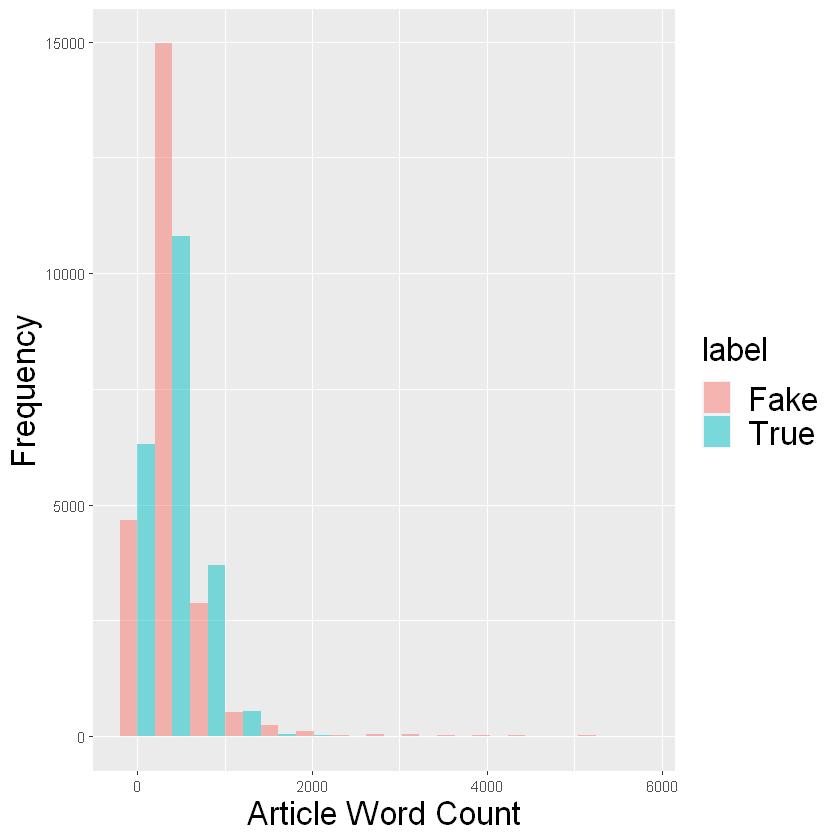

In [38]:
ggplot(df, aes(x = wc, fill = label)) +
    geom_histogram(alpha = 0.5, bins = 15, position = "dodge") + xlab("Article Word Count") + ylab("Frequency") +
    theme(plot.title = element_text(size = 12, face = "bold"),
    legend.title= element_text(size=20), 
    legend.text= element_text(size=20),
    axis.title = element_text(size=20))

In [19]:
library(stringr)
link = r"(https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|www\.[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9]+\.[^\s]{2,}|www\.[a-zA-Z0-9]+\.[^\s]{2,})"
df = df %>% rowwise %>% mutate(links = str_count(text, link))

In [28]:
df %>% group_by(label) %>% summarize(n = n())

label,n
<chr>,<int>
Fake,23523
True,21417


Warning message:
"Removed 39 rows containing non-finite values (stat_bin)."
Warning message:
"Removed 3 rows containing missing values (geom_bar)."


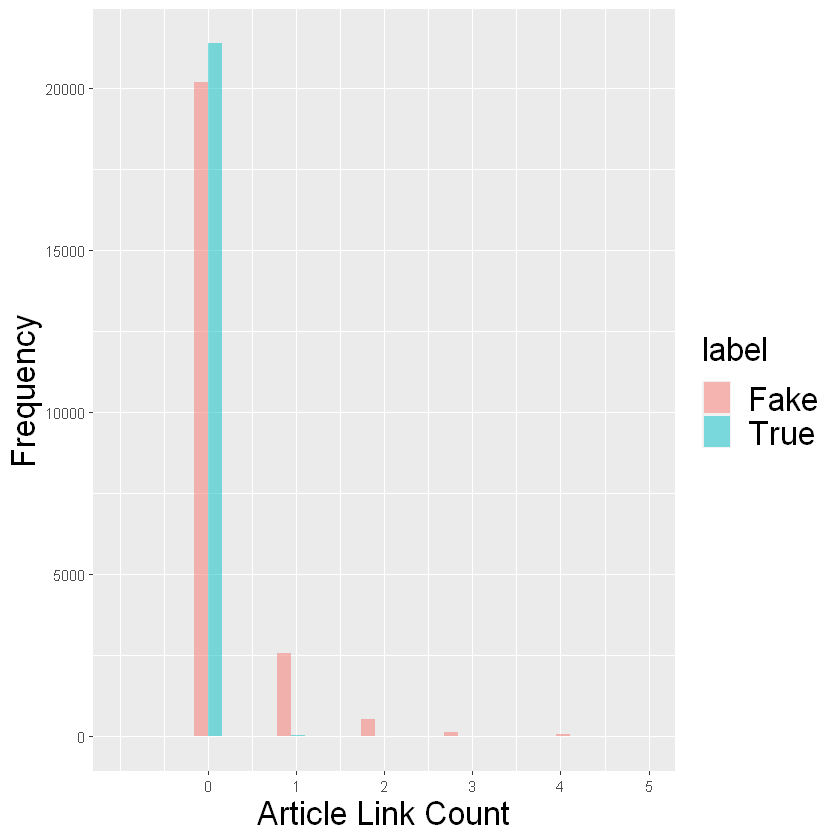

In [50]:
ggplot(df, aes(x = links, fill = label)) +
    geom_histogram(alpha = 0.5, bins = 20, position = "dodge") + xlab("Article Link Count") + ylab("Frequency") +
    theme(plot.title = element_text(size = 12, face = "bold"),
    legend.title= element_text(size=20), 
    legend.text= element_text(size=20),
    axis.title = element_text(size=20)) +
    scale_x_continuous(breaks = c(0,1,2,3,4,5), limits = c(-1, 5))

In [54]:
library(wordcloud)
library(RColorBrewer)
library(wordcloud2)
library(tm)

Warning message in tm_map.SimpleCorpus(., removeNumbers):
"transformation drops documents"
Warning message in tm_map.SimpleCorpus(., removePunctuation):
"transformation drops documents"
Warning message in tm_map.SimpleCorpus(., stripWhitespace):
"transformation drops documents"
Warning message in tm_map.SimpleCorpus(docs, content_transformer(tolower)):
"transformation drops documents"
Warning message in tm_map.SimpleCorpus(docs, removeWords, stopwords("english")):
"transformation drops documents"


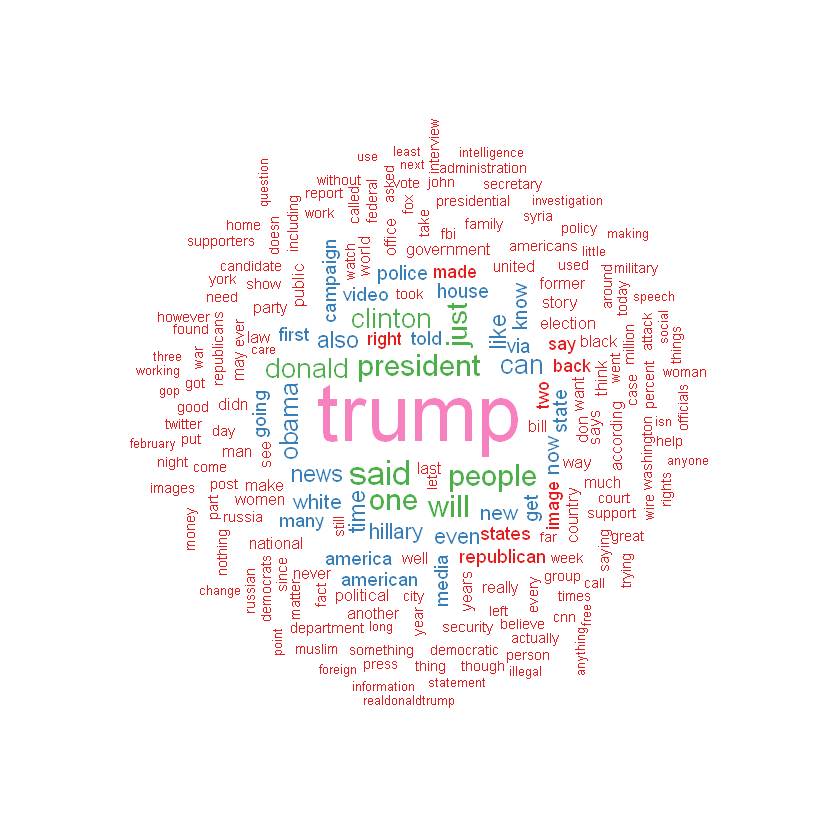

In [76]:
ftext = fake[sample(1:nrow(fake), 1000),]$text
cloud(ftext, 123, "Set1")

Warning message in tm_map.SimpleCorpus(., removeNumbers):
"transformation drops documents"
Warning message in tm_map.SimpleCorpus(., removePunctuation):
"transformation drops documents"
Warning message in tm_map.SimpleCorpus(., stripWhitespace):
"transformation drops documents"
Warning message in tm_map.SimpleCorpus(docs, content_transformer(tolower)):
"transformation drops documents"
Warning message in tm_map.SimpleCorpus(docs, removeWords, stopwords("english")):
"transformation drops documents"


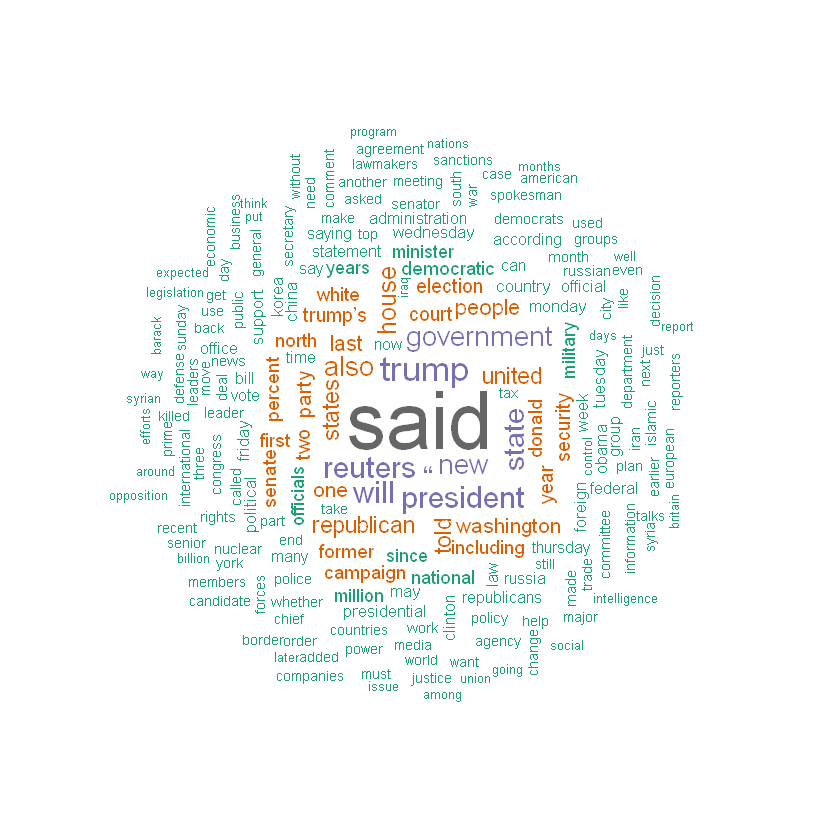

In [77]:
ttext = true[sample(1:nrow(true), 1000),]$text
cloud(ttext, 123, "Dark2")

In [74]:
cloud = function(text, seed, pal){
docs <- Corpus(VectorSource(text))
docs <- docs %>%
  tm_map(removeNumbers) %>%
  tm_map(removePunctuation) %>%
  tm_map(stripWhitespace)
docs <- tm_map(docs, content_transformer(tolower))
docs <- tm_map(docs, removeWords, stopwords("english"))

dtm <- TermDocumentMatrix(docs) 
matrix <- as.matrix(dtm) 
words <- sort(rowSums(matrix),decreasing=TRUE) 
df2 <- data.frame(word = names(words),freq=words)

set.seed(seed) # for reproducibility 
wordcloud(words = df2$word, freq = df$freq, min.freq = 1,
          max.words=200, random.order=FALSE, rot.per=0.35,
          colors=brewer.pal(8, pal))
    
}